In [159]:
import os
import json
from kaggle.api.kaggle_api_extended import KaggleApi

OSError: Could not find kaggle.json. Make sure it's located in C:\Users\fuyuz\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [ ]:
with open('D:/MachineLearning/Kaggle/kaggle.json', 'r') as f:
    kaggle_config = json.load(f)

os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

api = KaggleApi()
api.authenticate()

api.dataset_download_files("joebeachcapital/30000-spotify-songs", 
                           path='D:/MachineLearning/Kaggle/data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs


ValueError: time data 'Wed, 01 Nov 2023 06:06:47 GMT' does not match format '%a, %d %b %Y %H:%M:%S %Z'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

[datasets](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs)

# First Touch of data 

In [2]:
df = pd.read_csv("D:/MachineLearning/Kaggle/data/spotify_songs.csv")

In [3]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# Split training and testing dataset

In [5]:
from sklearn.model_selection import train_test_split

df_1 = df.copy() # 保留原 data
df_train, df_test = train_test_split(df_1, test_size=0.2, random_state=42)

In [6]:
df_train.shape, df_test.shape

((26266, 23), (6567, 23))

# EDA

# Preprocessing

In [7]:
df_train_num = df_train.iloc[:, [3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] # 含 key 和 mode
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["key", "mode"])]

df_train_cat = df_train.drop(columns= df_train_num.columns)

In [8]:
df_train_num.head()

track_popularity  danceability  energy  loudness  speechiness  \
12593                68         0.415   0.658   -12.051       0.0696   
791                   1         0.655   0.884    -6.515       0.0602   
25523                33         0.847   0.696    -6.113       0.0642   
31510                 0         0.596   0.910    -5.937       0.0385   
10241                45         0.877   0.665    -6.116       0.0538   

       acousticness  instrumentalness  liveness  valence    tempo  duration_ms  
12593      0.000045          0.000735    0.1760    0.450  163.015       168406  
791        0.010200          0.000000    0.2590    0.772  140.008       219240  
25523      0.052000          0.004020    0.0795    0.763  140.678       183253  
31510      0.000629          0.001370    0.1780    0.484  127.963       182461  
10241      0.406000          0.000035    0.2320    0.143  122.004       199078

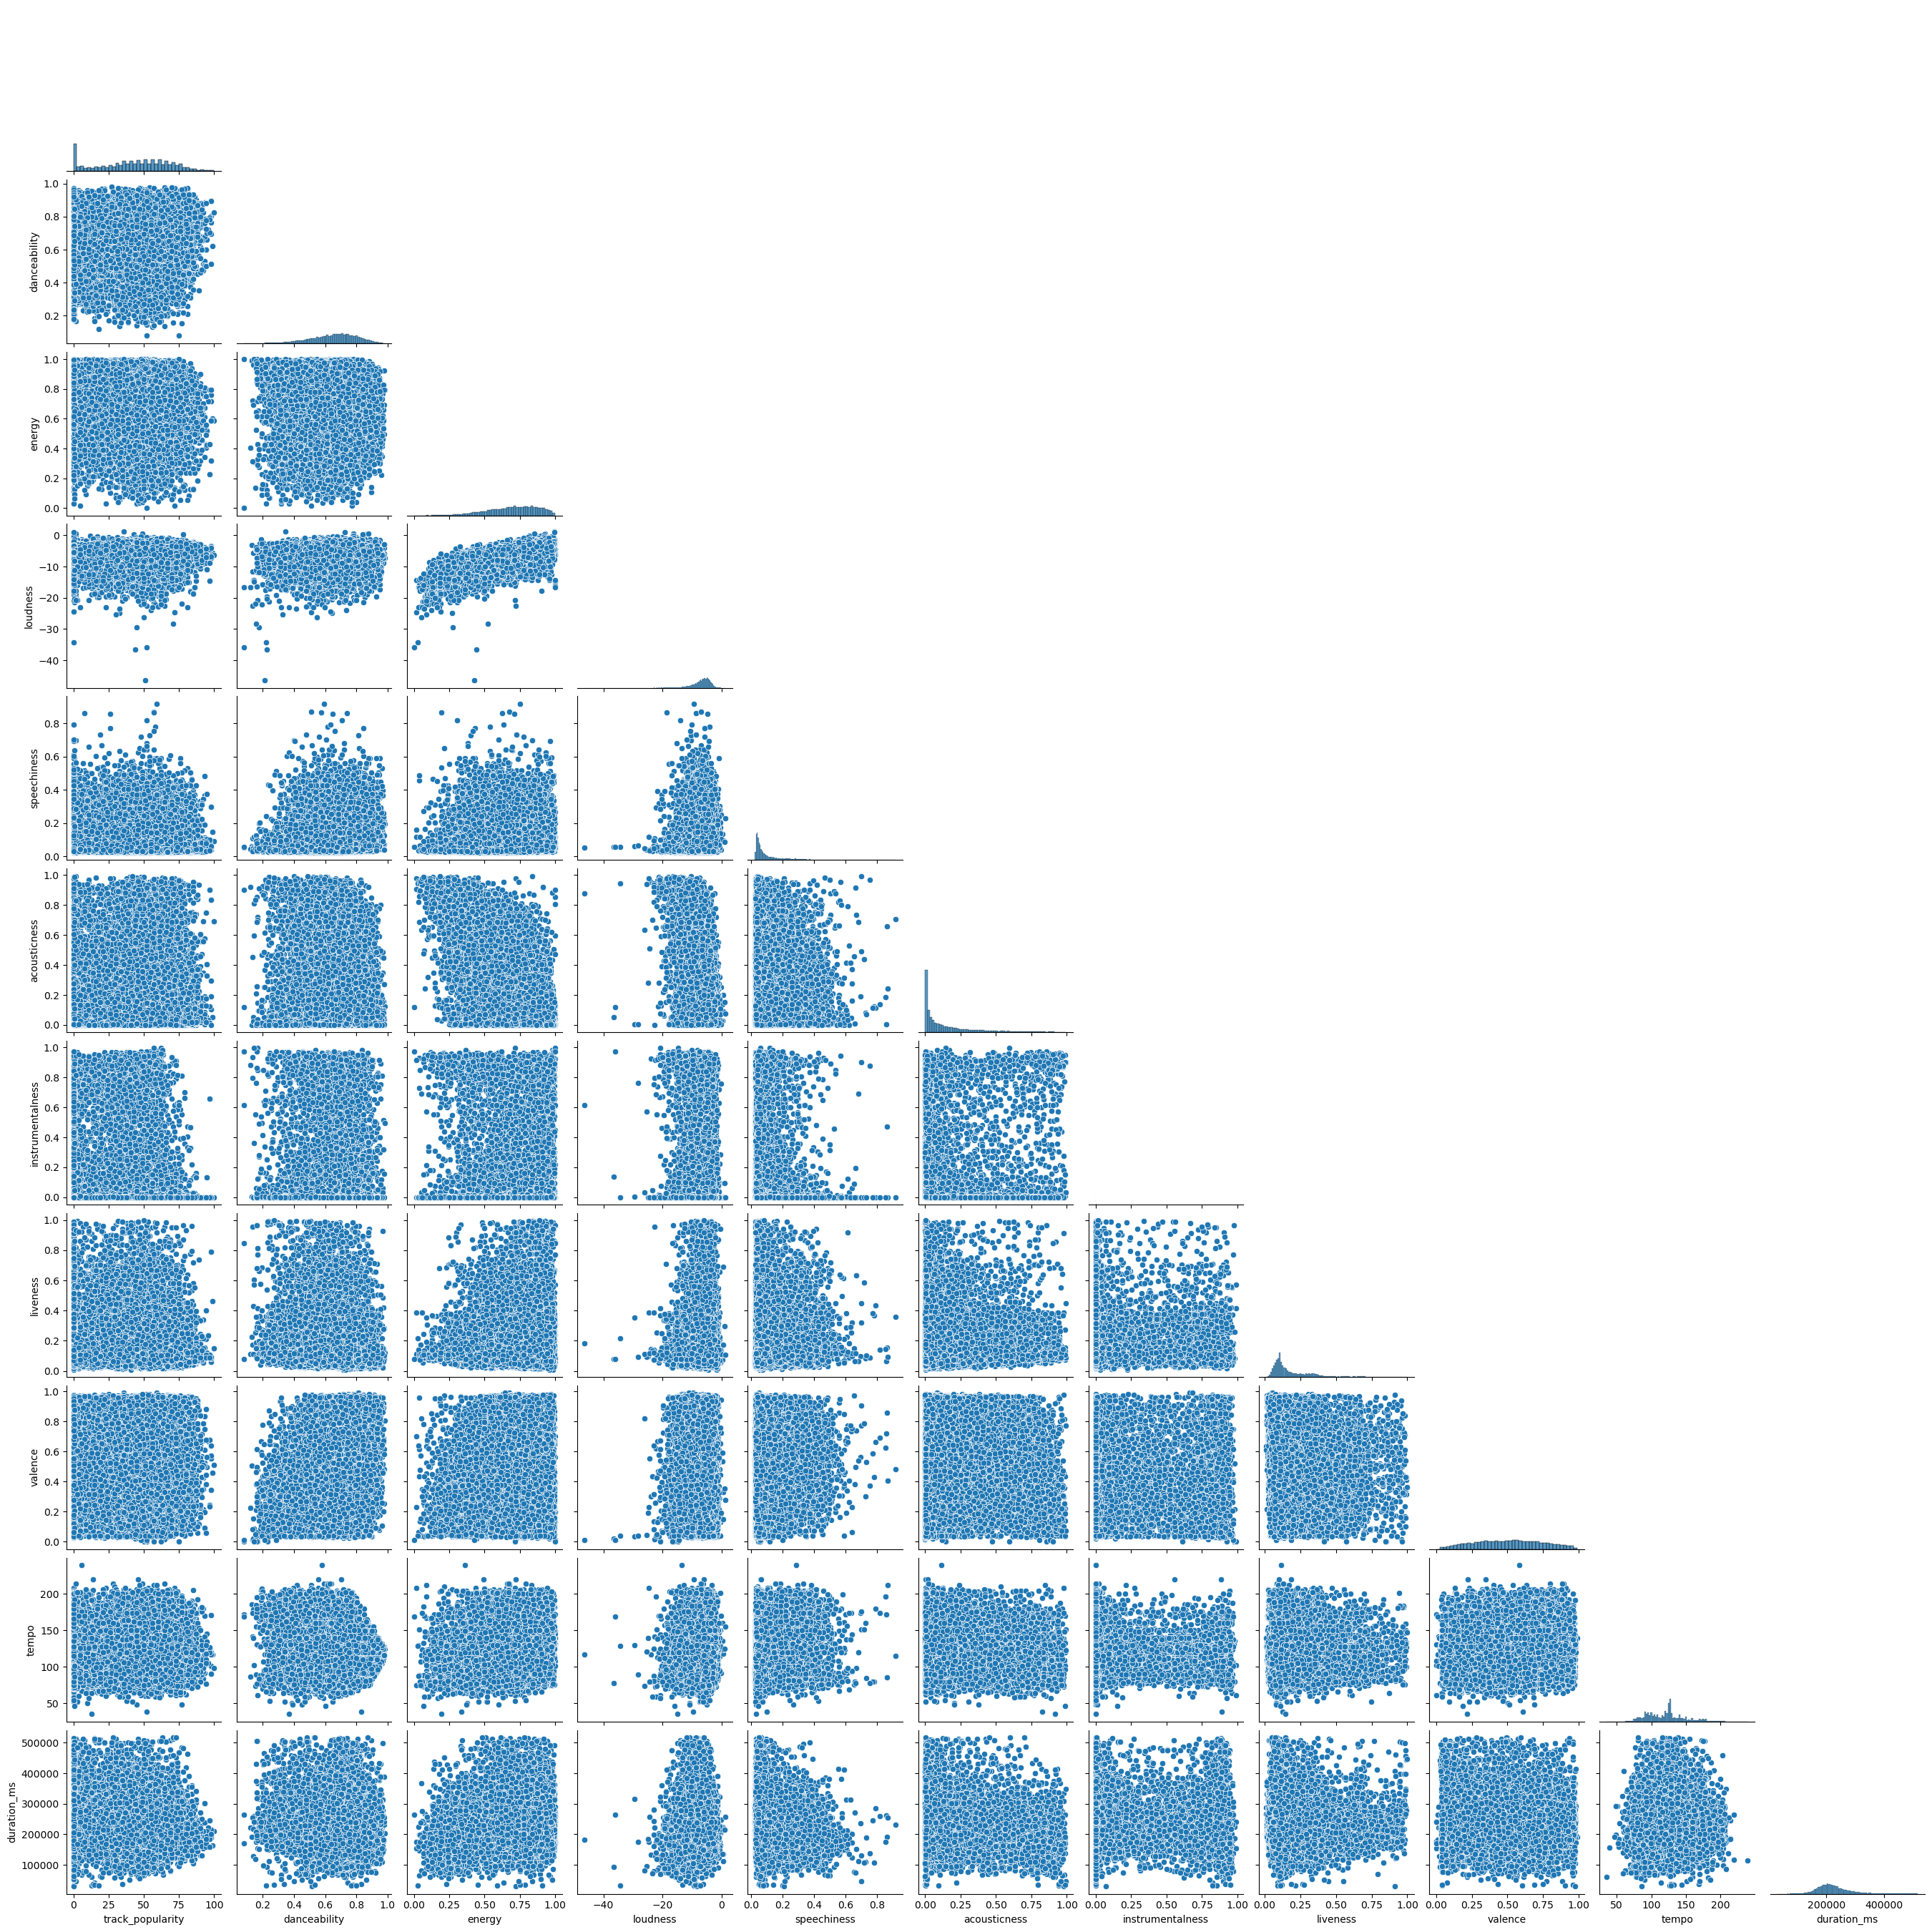

In [9]:
sns.pairplot(df_train_num, corner=True)
plt.show()

## Transformation for numerical variables

Check distributions first.

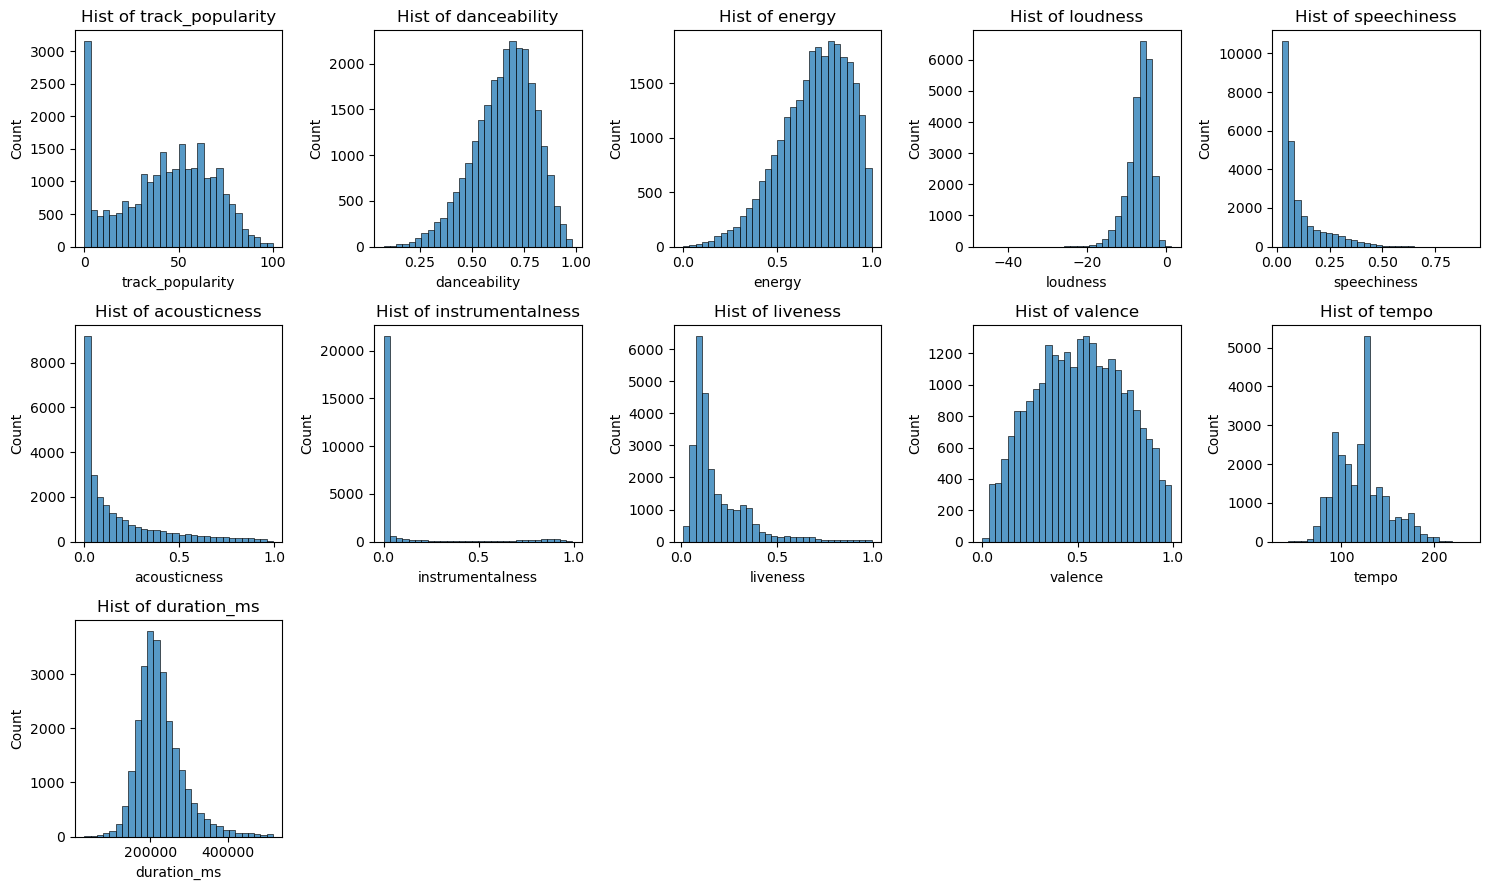

In [10]:
figure, axes = plt.subplots(3, 5, figsize = (15,9))

for i in range(5):
    sns.histplot(df_train_num.iloc[:,i], ax = axes[0,i], bins=30 )
    axes[0,i].set_title(f"Hist of {df_train_num.columns[i]}")

for i in range(5):
    sns.histplot(df_train_num.iloc[:,i+5], ax = axes[1,i], bins=30)
    axes[1,i].set_title(f"Hist of {df_train_num.columns[i+5]}")

sns.histplot(df_train_num.iloc[:,10], ax = axes[2,0], bins=30)
axes[2,0].set_title(f"Hist of {df_train_num.columns[10]}")

for ax in axes.flat[11:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

First notice:

- Many 0 track popularity value (our response variable)

- Some variables are skewed

In [11]:
df_train_num["track_popularity"].value_counts()

track_popularity
0      2144
1       474
57      439
60      411
47      408
       ... 
97       19
95       10
96        6
99        3
100       2
Name: count, Length: 101, dtype: int64

In [12]:
print("Track popularity proportion: ", np.round(df_train_num["track_popularity"].value_counts()[0] / df_train_num.shape[0], 2))

Track popularity proportion:  0.08


In [13]:
df_train_num = df_train_num[df_train_num["track_popularity"] != 0] # drop rows with track popularity 0
df_train_cat = df_train_cat.loc[df_train_num.index,:] # Don't forget the category df

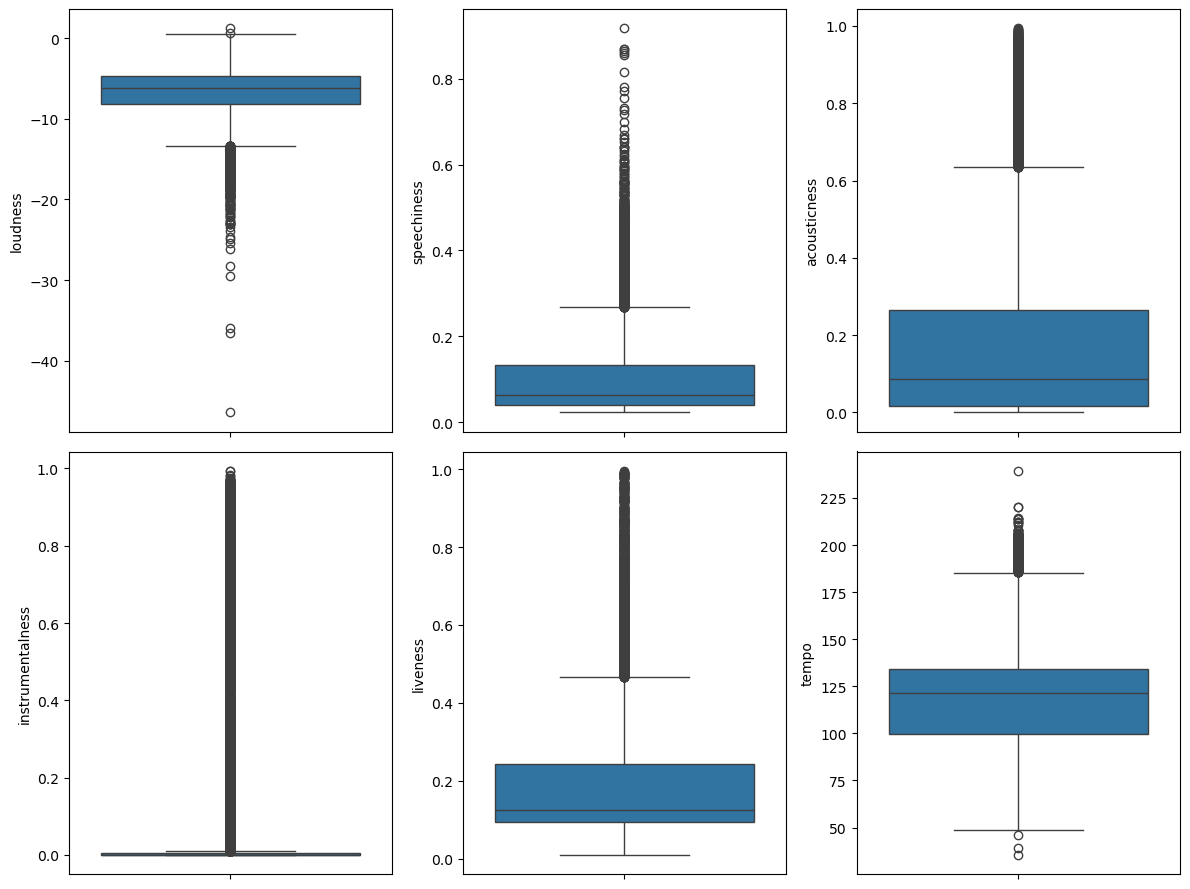

In [14]:
fig, axes = plt.subplots(2,3, figsize = (12,9))

sns.boxplot(df_train_num["loudness"], ax=axes[0,0])
sns.boxplot(df_train_num["speechiness"], ax=axes[0,1])
sns.boxplot(df_train_num["acousticness"], ax=axes[0,2])

sns.boxplot(df_train_num["instrumentalness"], ax=axes[1,0])
sns.boxplot(df_train_num["liveness"], ax=axes[1,1])
sns.boxplot(df_train_num["tempo"], ax=axes[1,2])

plt.tight_layout()
plt.show()

In [15]:
def proportion_outlier_num(column):
    result = df_train_num[(df_train_num[column] > df_train_num[column].quantile(0.75)) | (df_train_num[column] < df_train_num[column].quantile(0.25))].shape[0] / df_train_num.shape[0]

    return np.round(result, 3)

print("loudness outlier proportion: ", proportion_outlier_num("loudness"))
print("speechiness outlier proportion: ", proportion_outlier_num("speechiness"))
print("acousticness outlier proportion: ", proportion_outlier_num("acousticness"))
print("instrumentalness outlier proportion: ", proportion_outlier_num("instrumentalness"))
print("liveness outlier proportion: ", proportion_outlier_num("liveness"))
print("tempo outlier proportion: ", proportion_outlier_num("tempo"))

loudness outlier proportion:  0.5
speechiness outlier proportion:  0.497
acousticness outlier proportion:  0.499
instrumentalness outlier proportion:  0.25
liveness outlier proportion:  0.499
tempo outlier proportion:  0.5


Not ideal to just remove all the outliers.

Variable transformation

- Convert 'instrumentalness' to binary categorical variable(whether the song is an instrumental track)

- Convert 'speechiness' to multi-level categorical variable

- Convert 'acousticness' to binary categorical variable(whether the song is an acoustic track)

- Convert 'liveness' to binary categorical variable(whether the song is live)

- log(abs(loudness))

- boxcox(tempo)


In [16]:
# all the thresholds are set as the variable description suggested
df_train_num["instrumentalness"] = np.where(df_train_num["instrumentalness"] > 0.5, "instrument", "non-instrument")

df_train_num["speechiness"] = pd.cut(df_train_num["speechiness"], bins = [0, 0.33, 0.66, 1.0], labels = ["non-speech_track", "speech_like_track", "speech"])

df_train_num["acousticness"] = np.where(df_train_num["acousticness"] > 0.5, "acoustic", "non-acoustic")

df_train_num["liveness"] = np.where(df_train_num["liveness"] > 0.8, "live", "non-live") 

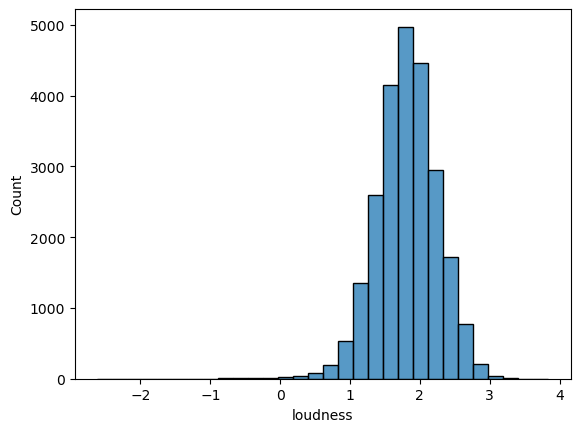

In [17]:
df_train_num["loudness"] = np.log(abs(df_train_num["loudness"]))

sns.histplot(df_train_num["loudness"], bins=30)
plt.show()

λ:  0.9686991690788963


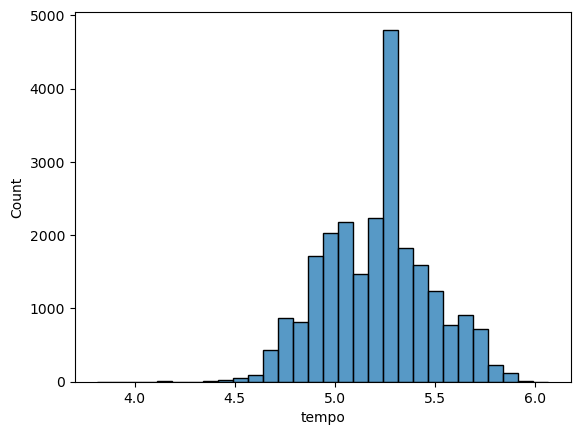

In [18]:
from scipy.stats import boxcox

df_train_num["tempo"] = boxcox(df_train_num["tempo"])[0]
print("\u03BB: ", boxcox(df_train_num["tempo"])[1])

sns.histplot(df_train_num["tempo"], bins = 30)
plt.show()

In [19]:
# update category df and numerical df
df_train_cat = pd.concat([df_train_cat, df_train_num[["instrumentalness", "speechiness", "acousticness", "liveness"]]], axis=1)

df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["instrumentalness", "speechiness", "acousticness", "liveness"])]

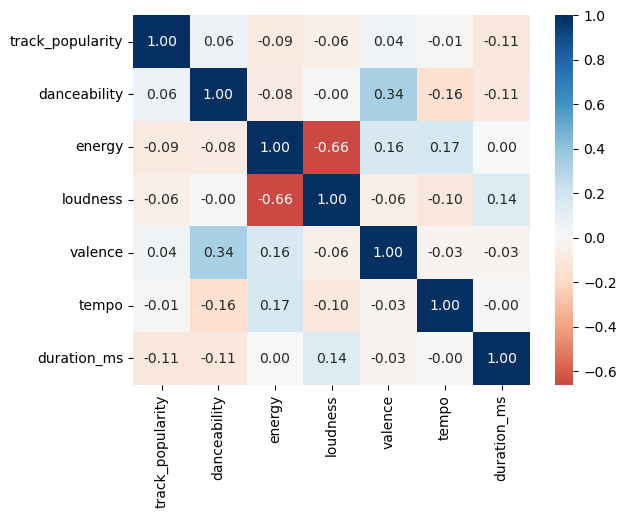

In [20]:
corr = df_train_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0)
plt.show()

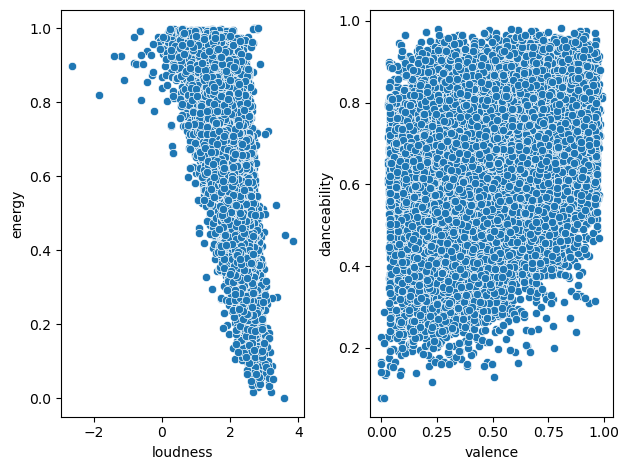

In [21]:
fig, axes = plt.subplots(1,2)

sns.scatterplot(x = df_train_num["loudness"], y = df_train_num["energy"], ax=axes[0])

sns.scatterplot(x = df_train_num["valence"], y = df_train_num["danceability"], ax=axes[1])
plt.tight_layout()
plt.show()

It's commen sense that the louder the music, the more energy it has. We combine these two columns, assign them equal weights.

In [22]:
df_train_num["loudness_energy_combined"] = (df_train_num["loudness"] + df_train_num["energy"]) / 2
df_train_num = df_train_num.loc[:, ~ df_train_num.columns.isin(["energy", "loudness"])]

In [23]:
df_train.shape

(26266, 23)

## Categorical Variable

Relation among all the qualitative attributes that we have not processed so far.

<div align="center">
    <img src="./Song.png" width="600">
</div>

### Bag-of-word Matrix

For each song, we concatenate the `song title`, `album name`, `playlist genre` and `sub-playlist genre`, then based on the concatenated sentences, we create a bag-of-word matrix. 

[pandas Vectorized String Operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)

#### Text Cleaning

In [24]:
df_train_cat.head()

track_id                           track_name  \
12593  1Y373MqadDRtclJNdnUXVc             Paranoid - 2016 Remaster   
791    40WzXFabdkT1KCgRYwoz8X                   Generation Of Love   
25523  3irumzUB7UlJqoVZCqR3kI                         Know You Now   
10241  5c5nIaR4AlqYK1cZhCBOKH  Plaqtudum - Frijo & Negro Dub Remix   
30443  0LNXVezPVx0n1dSyTFKpor                          2020 Vision   

        track_artist          track_album_id  \
12593  Black Sabbath  6r7LZXAVueS5DqdrvXJJK7   
791        Masterboy  0y01fluOw7z4BxN06InlRr   
25523  Amy Winehouse  3kGbxqlVl3LqjifxlubtcT   
10241     Recayd Mob  7tRMfG7SsfmnDZyRckouaJ   
30443          Kyzer  2MmKamBua41RBNXGssbAR8   

                          track_album_name track_album_release_date  \
12593             Paranoid (2014 Remaster)               1970-09-18   
791                     Generation Of Love               1995-01-01   
25523                                Frank               2003-10-20   
10241  Plaqtudum (Frijo & Negro Dub Remix)               2019-12-13   
30443                          2020 Vision               2020-01-03   

                                           playlist_name  \
12593                               Classic Rock Workout   
791                                       90s Dance Hits   
25523             Neo Soul / Modern Jazz / Smooth Hiphop   
10241                                           Trapperz   
30443  2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...   

                  playlist_id playlist_genre playlist_subgenre  key  mode  \
12593  37i9dQZF1DWYNSm3Z3MxiM           rock      classic rock    4     0   
791    50cXvxgMGrvoUeLhkzCyIO            pop         dance pop    6     0   
25523  07SNJ4MwYba9wwmzrbjmYi            r&b          neo soul    5     0   
10241  37i9dQZF1DWUmxBdWX3Pp4            rap              trap    1     1   
30443  2DjIfVDXGYDgRxw7IJTKVb            edm           pop edm    7     1   

      instrumentalness       speechiness  acousticness  liveness  
12593   non-instrument  non-speech_track  non-acoustic  non-live  
791     non-instrument  non-speech_track  non-acoustic  non-live  
25523   non-instrument  non-speech_track  non-acoustic  non-live  
10241   non-instrument  non-speech_track  non-acoustic  non-live  
30443   non-instrument  non-speech_track  non-acoustic  non-live

There are songs appearing multiple times.

In [25]:
df_train_cat["track_name"].value_counts()

track_name
Breathe                                 18
Alive                                   17
Let Me Love You                         15
Stay                                    14
Paradise                                14
                                        ..
真っ赤な太陽                                   1
From the Beginning - 2015 - Remaster     1
Receipt                                  1
Depiction                                1
Rocksteady                               1
Name: count, Length: 17982, dtype: int64

An example of a song that appears multiple times in different albums and playlist.

In [26]:
df.loc[df_train_cat[df_train_cat["track_name"] == "Poker Face"].index]

track_id  track_name track_artist  track_popularity  \
2548   0le79px2kIBXQDxUe8ZUGP  Poker Face    Lady Gaga                14   
20708  0WfKDYeUAoLA3vdvLKKWMW  Poker Face    Lady Gaga                69   
2134   70vvnTUamBXOc0vRk7BBDu  Poker Face    Lady Gaga                55   
2892   6w1hZMlo2SVuq29liebhb8  Poker Face    Lady Gaga                 6   
30083  4ngLDnC9X0ARJATJTXljdC  Poker Face    Lady Gaga                42   
2080   1QV6tiMFM6fSOKOGLMHYYg  Poker Face    Lady Gaga                76   
165    0WfKDYeUAoLA3vdvLKKWMW  Poker Face    Lady Gaga                69   

               track_album_id                         track_album_name  \
2548   67j3NJodNRI8USUwKwTZA6  The Fame Monster (International Deluxe)   
20708  2FBA8NCSuQNi8jaR2Xjbal                                 The Fame   
2134   7j7iPq5rokadGr1ZdJRGgE  The Fame Monster (International Deluxe)   
2892   482HqzMMfrkFXAGujtwFrm                               Poker Face   
30083  5drTYB3sPmtgLTnj04FUad                                 The Fame   
2080   1qwlxZTNLe1jq3b0iidlue                                 The Fame   
165    2FBA8NCSuQNi8jaR2Xjbal                                 The Fame   

      track_album_release_date               playlist_name  \
2548                2009-01-01  Electropop Hits  2017-2020   
20708               2008-01-01   Today's Hits 2000-Present   
2134                2009-01-01               BALLARE - رقص   
2892                2008-09-26            Electropop - Pop   
30083               2008-01-01          Pop Hits 2000-2019   
2080                2008-01-01               post teen pop   
165                 2008-01-01                   Dance Pop   

                  playlist_id playlist_genre  ... key  loudness  mode  \
2548   7kyvBmlc1uSqsTL0EuNLrx            pop  ...   4    -4.618     1   
20708  6a66cg3HcsjYkisYyQcov6          latin  ...   4    -4.618     1   
2134   1CMvQ4Yr5DlYvYzI0Vc2UE            pop  ...   4    -4.618     1   
2892   5TiiHps0hNCyQ6ijVkNZQs            pop  ...   4    -4.609     1   
30083  6mtYuOxzl58vSGnEDtZ9uB            edm  ...   4    -4.603     1   
2080   2ltt5ouiEO301o2jbxn30d            pop  ...   4    -4.620     1   
165    37i9dQZF1DWZQaaqNMbbXa            pop  ...   4    -4.618     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
2548        0.0788         0.120          0.000001    0.1220    0.775   
20708       0.0786         0.120          0.000001    0.1210    0.776   
2134        0.0788         0.120          0.000001    0.1220    0.775   
2892        0.0752         0.124          0.000002    0.0869    0.753   
30083       0.0746         0.111          0.000003    0.0946    0.795   
2080        0.0787         0.118          0.000002    0.1210    0.787   
165         0.0786         0.120          0.000001    0.1210    0.776   

         tempo  duration_ms  
2548   119.002       237200  
20708  119.001       237200  
2134   119.002       237200  
2892   119.002       237400  
30083  119.002       237200  
2080   118.999       237200  
165    119.001       237200  

[7 rows x 23 columns]

##### 1. Song Title

We notice that some song titles contain sub-information, which are in '( ... )' or behind '-', this type of information is usually about the featuring artists, remixing artists, remastered songs, sub-titles, and etc.

In [27]:
# title 结尾带 (...)
# title 结尾带 (... feat ...) 是 # title 结尾带 (...) 的 subset
process_df = df_train_cat[df_train_cat["track_name"].str.contains(r"\([^()]*\)\s*$", na=False)]
process_df.sample(10, random_state=42)

track_id                                    track_name  \
3369   1ORb6uGvpjsFwZK8FUpzWy              Aire soy (feat. Ximena Sariñana)   
11891  4h0Mdpmg9VXarbLIGPqJUs        Tonight's the Night (Gonna Be Alright)   
26290  63hpwQ6bWNxQ0YWTUaGtha                           Shimasyou! (Do It!)   
4346   3a1Zmq0P1E6W80x8EOcVNP                      Tough (feat. Noah Kahan)   
12495  4ECNtOnqzxutZkXP4TE3n3                  Separate Ways (Worlds Apart)   
25753  5HycJMEM8MyX4i0ErSeuC4                  Good Love (feat. Jay Prince)   
19272  3QwBODjSEzelZyVjxPOHdq                     Otra vez (feat. J Balvin)   
2609   49ATdDBSasXb6wsHdrB2xQ        No Candle No Light (feat. Nicki Minaj)   
31518  3wSrPtJpnGaUC2hOmJy0BV                            Beast (All as One)   
27341  6fczHcaWu4h7UYLQTXL6w8  Is That Too Much to Ask (feat. Nina Zeitlin)   

                    track_artist          track_album_id  \
3369                 Miguel Bosé  6mgs9ywhBqW5QSCMyYPC3g   
11891                Rod Stewart  6z4jnK1fRHP80RJC8x9UFd   
26290                Night Tempo  6J30sBc6ZgSAr9LvylXsKz   
4346                  Quinn XCII  7zGPSFi3LOIC1L5Dj0oEBx   
12495                    Journey  2EFUNYmwxe0AOGxBORrfaw   
25753                Brasstracks  4dj2CRLWvdFgEzsVtc2qr6   
19272              Zion & Lennox  22lEQJ7khtB2yvsq84FDQb   
2609                        ZAYN  5SYsmwLMVdd4dD2SziOHlj   
31518  Dimitri Vegas & Like Mike  7jcGJ20TXkDOwe5rfOm2Gg   
27341                 Biboulakis  5VOdrHq3pi0FTHQZtBaj7V   

                             track_album_name track_album_release_date  \
3369                         Papitwo (Deluxe)               2012-09-04   
11891                     A Night on the Town                     1976   
26290                                 Fantasy               2017-04-20   
4346                  From Michigan With Love               2019-02-15   
12495                               Frontiers               1983-02-01   
25753                               Good Love               2016-08-19   
19272                                Motivan2               2016-09-30   
2609   No Candle No Light (feat. Nicki Minaj)               2018-11-15   
31518                      Beast (All as One)               2019-11-15   
27341             Electro Swing Fever, Vol. 3               2014-02-17   

                             playlist_name             playlist_id  \
3369                 ELECTROPOP EN ESPAÑOL  3VfscqF7zq65IGKiYM3FS0   
11891  70s Pop & Rock Hits and Deep Tracks  1uKFRCQYci8kVgMy3xzTVH   
26290     Japanese Funk/Soul/NEO/Jazz/Acid  4zNayWuATXCAA9gaXvnFnq   
4346               2019 in Indie Poptimism  16RNbqnNCCLlBJti7JU5nc   
12495                         Classic Rock  5BygwTQ3OrbiwVsQhXFHMz   
25753          Groovy // Funky // Neo-Soul  0JmBB9HfrzDiZoPVRdv8ns   
19272                     Reggaeton Rewind  37i9dQZF1DXco4ODkIraMD   
2609                       Electropop 2019  4Bi8VLtaSu0JILliif8lH6   
31518                     Hands Up‏‏​​   ‍  1lSdljPk8zcAdXVMUduDia   
27341                Electro Swing Top 100  5M7xLCQTYJL0lbKIrUn3a4   

      playlist_genre          playlist_subgenre  key  mode instrumentalness  \
3369             pop                 electropop   10     0   non-instrument   
11891           rock                 album rock   11     1   non-instrument   
26290            r&b                   neo soul    8     1   non-instrument   
4346             pop            indie poptimism   10     1   non-instrument   
12495           rock               classic rock    0     1   non-instrument   
25753            r&b                   neo soul    6     0   non-instrument   
19272          latin                  reggaeton   10     1   non-instrument   
2609             pop                 electropop    5     0   non-instrument   
31518            edm  progressive electro house    5     0       instrument   
27341            edm              electro house    2     1   non-instrument   

             speechiness  acoustic

In [28]:
# title 带 '-' 
df_train_cat[df_train_cat["track_name"].str.contains(r"-", case=False, na=False)].sample(10, random_state=42)

track_id  \
20643  22Nq8jG98vSGghSyBsIjMO   
12089  0oHH9pt7O822uyspUQW0NW   
30379  4mtHXZBOBMrZSI6jp3X9WJ   
11032  224EVTFiLsdQignUFLvDeH   
31490  5uQk4fZO52goTrjVTvX8F3   
27381  2wAfJqzEXakJyDJeR8hYnW   
31794  1Y4oU6y3FTu2mO8EPu7FgA   
11747  70YvYr2hGlS01bKRIho1HM   
25663  1Z5B5x1vsgwmR6M4B8ndwU   
8219   7LdaPYlRo4pq6CBt44To2H   

                                              track_name      track_artist  \
20643                    Jam On It (Re-Recorded Version)          Newcleus   
12089               Flick Of The Wrist - Remastered 2011             Queen   
30379                              Espelho Meu - Ao Vivo  Henrique & Diego   
11032                                      Pa Mí - Remix             Dalex   
31490                        Left Behinds - Original Mix       Paris Blohm   
27381                                 Fever - Radio edit     Varrick Frost   
31794                               Take Me - Radio Edit            Tiësto   
11747                          La Grange - 2005 Remaster            ZZ Top   
25663                           Palm Trees - Motez Remix          GoldLink   
8219   Bouncin' Back (Bumpin' Me Against the Wall) (f...          Mystikal   

               track_album_id                              track_album_name  \
20643  5PPWqRkUyE2vL7T4etqhs9               Jam On It (Re-Recorded Version)   
12089  5SBHID8qGG3x52zgoh2ilz            Sheer Heart Attack (2011 Remaster)   
30379  7wKgAENXX8ZCtOL6vyL3GU                    Henrique & Diego (Ao Vivo)   
11032  4OyP4eAtpTHXjpVBjJvPNG                                 Pa Mí (Remix)   
31490  1MTVA9JBXZ0db11sIb9IiQ                                  Left Behinds   
27381  3Fx01GHJyoQt1cC6Yu1qL0                         Fever (Electro Swing)   
31794  4SHlBT6B3kL8bdj6X2xHRp                        A Town Called Paradise   
11747  0Em8m9kRctyH9S3MTXAHvY         Tres Hombres (Expanded 2006 Remaster)   
25663  58Qn0fNPQBC2aYeP6XkQeb  And After That, We Didn't Talk - The Remixes   
8219   22qrzIjC0d35poqKloCQaU                                     Tarantula   

      track_album_release_date  \
20643               2009-01-01   
12089               1974-11-08   
30379               2019-02-01   
11032               2019-02-07   
31490               2014-06-09   
27381               2018-11-01   
31794               2014-06-13   
11747               1973-07-26   
25663               2016-06-10   
8219                2001-12-18   

                                           playlist_name  \
20643  80's Freestyle/Disco Dance Party (Set Crossfad...   
12089                The Queen - La Discografia Completa   
30379  Verão 2020 | Pop | Funk | Sertanejo | EDM | To...   
11032                    Trap Argentino - Trap Argentina   
31490                                        Vocal House   
27381                              Electro Swing Top 100   
31794                                    2011-2014 House   
11747                            House Of The Rising Sun   
25663                        Groovy // Funky // Neo-Soul   
8219                                    Southern Hip Hop   

                  playlist_id playlist_genre          playlist_subgenre  key  \
20643  1oReEujyWpQv2OX68BVPPA          latin              latin hip hop    1   
12089  3E88dLx4fgFYY70gdGzdnB           rock                 album rock    4   
30379  5HmZtuuIDMtIy21kylqhx6            edm                    pop edm    6   
11032  6ltss0ThreZ3uIMn5mr4Tm            rap                       trap   11   
31490  5PCAWKfUWAUj8VeY8G7xRQ            edm  progressive electro house    6   
27381  5M7xLCQTYJL0lbKIrUn3a4            edm              electro house    4   
31794  53Ga3Xt9fumdJfhNNSBvzU            edm  progressive electro house    0   
11747  1bMYfBHYBCRHY5LGkjlpSy           rock                 album rock    4   
25663  0JmBB9HfrzDiZoPVRdv8ns            r&b                   neo soul    2   
8219   3R5c1OfJY7Rzl3p28pzGtL            rap           southern hip hop    0   

       mode

We only care about the main title, so we remove all the unnecessary information.

核心：只保留每首歌的main title

1. 处理 title 带 '-' 的

2. 处理 title 带 '()'的

In [29]:
from unidecode import unidecode

df_train_cat["track_name"] = df_train_cat["track_name"].str.lower() # lowercase song title
df_train_cat["track_name"] = df_train_cat["track_name"].map(lambda x: unidecode(x)) # 处理类英文letter，至英文

print("Number of title with none English letter: ", df_train_cat["track_name"].str.contains(r"[^\x00-\x7F]+", regex=True).sum())

Number of title with none English letter:  0


In [30]:
# title 带 '-' 的一共 3591
process_df = df_train_cat[df_train_cat["track_name"].str.contains(r"-", case=False, na=False)]

print("\n rows: ", process_df.shape[0])
process_df.head()


 rows:  3591


track_id  \
12593  1Y373MqadDRtclJNdnUXVc   
10241  5c5nIaR4AlqYK1cZhCBOKH   
29098  4eO9fpVqqswS43IVM8PYbb   
30187  54CO2VulHs86lUBCnuuGZc   
20664  7LcfRTgAVTs5pQGEQgUEzN   

                                              track_name   track_artist  \
12593                           paranoid - 2016 remaster  Black Sabbath   
10241                plaqtudum - frijo & negro dub remix     Recayd Mob   
29098  world of dreams (feat. mary jane smith) - radi...       Galavant   
30187                false alarm - justice skolnik remix         Matoma   
20664  moves like jagger - studio recording from the ...       Maroon 5   

               track_album_id  \
12593  6r7LZXAVueS5DqdrvXJJK7   
10241  7tRMfG7SsfmnDZyRckouaJ   
29098  6kvatc1swEPVSatPUV2k5K   
30187  2hsxoaUJi544tpjXEbotwx   
20664  7strNUlU6xZqlVWBNUdOYv   

                                        track_album_name  \
12593                           Paranoid (2014 Remaster)   
10241                Plaqtudum (Frijo & Negro Dub Remix)   
29098  World of Dreams (feat. Mary Jane Smith) [Radio...   
30187                      False Alarm (Remixes Vol. II)   
20664                                     Hands All Over   

      track_album_release_date  \
12593               1970-09-18   
10241               2019-12-13   
29098               2014-06-09   
30187               2016-10-07   
20664                     2010   

                                           playlist_name  \
12593                               Classic Rock Workout   
10241                                           Trapperz   
29098  big boom room — TOMORROWLAND EDC EDM BIG ROOM ...   
30187                                  EDM - pop remixes   
20664                          Today's Hits 2000-Present   

                  playlist_id playlist_genre playlist_subgenre  key  mode  \
12593  37i9dQZF1DWYNSm3Z3MxiM           rock      classic rock    4     0   
10241  37i9dQZF1DWUmxBdWX3Pp4            rap              trap    1     1   
29098  2oalsaFUockoPf1DU3wrL8            edm          big room    5     0   
30187  0cvVad4XizGbOS0vlwZYS5            edm           pop edm    8     1   
20664  6a66cg3HcsjYkisYyQcov6          latin     latin hip hop   11     0   

      instrumentalness       speechiness  acousticness  liveness  
12593   non-instrument  non-speech_track  non-acoustic  non-live  
10241   non-instrument  non-speech_track  non-acoustic  non-live  
29098   non-instrument  non-speech_track  non-acoustic  non-live  
30187   non-instrument  non-speech_track  non-acoustic  non-live  
20664   non-instrument  non-speech_track  non-acoustic  non-live

'- ... mix ...', '- ... remaster ...', '- ... version ...' , '- ... edit ...'

In [31]:
pattern = r"-.*(mix|remaster|version|edit).*?$" # '- ... mix ...', '- ... remaster ...', '- ... version ...' , '- ... edit ...'
df_train_cat[df_train_cat["track_name"].str.contains(pattern, case = False, na = False)]

C:\Users\fuyuz\AppData\Local\Temp\ipykernel_40420\3990337827.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train_cat[df_train_cat["track_name"].str.contains(pattern, case = False, na = False)]


track_id  \
12593  1Y373MqadDRtclJNdnUXVc   
10241  5c5nIaR4AlqYK1cZhCBOKH   
29098  4eO9fpVqqswS43IVM8PYbb   
30187  54CO2VulHs86lUBCnuuGZc   
27760  6PsThaFJEeaKMokhSPINnY   
...                       ...   
11653  0Ll60pqkEBHqzdeclRHdnl   
3943   2nDRtDihYqKsHUbxheXRTR   
11016  390MTexWq1Evy5eb0fMy1C   
8792   4VzCNmuj3f8RtWpSKFZiLp   
14502  1Qa0Y05al633fG8f9Peytc   

                                              track_name  \
12593                           paranoid - 2016 remaster   
10241                plaqtudum - frijo & negro dub remix   
29098  world of dreams (feat. mary jane smith) - radi...   
30187                false alarm - justice skolnik remix   
27760                      go to sleep - wahlstedt remix   
...                                                  ...   
11653               from the beginning - 2015 - remaster   
3943                  the devil's tears - sam feldt edit   
11016                           vuelta a la luna - remix   
8792                        who shot ya? - 2005 remaster   
14502                 maybe i'm amazed - remastered 2011   

                 track_artist          track_album_id  \
12593           Black Sabbath  6r7LZXAVueS5DqdrvXJJK7   
10241              Recayd Mob  7tRMfG7SsfmnDZyRckouaJ   
29098                Galavant  6kvatc1swEPVSatPUV2k5K   
30187                  Matoma  2hsxoaUJi544tpjXEbotwx   
27760            John De Sohn  5kSG2QMNAxjKdEcqMVks4T   
...                       ...                     ...   
11653  Emerson, Lake & Palmer  4Swf9iftTTaoEPbPXyxxUQ   
3943                  On June  50IG2595wL2PfnZ4JjeZhh   
11016                   Ysy A  6MzATUKdxkH3lIWZTtuJFI   
8792     The Notorious B.I.G.  7zg9ZSOQtYLjWnvSawflg6   
14502          Paul McCartney  2lOll0xAGw8FPjwmwopAKT   

                                        track_album_name  \
12593                           Paranoid (2014 Remaster)   
10241                Plaqtudum (Frijo & Negro Dub Remix)   
29098  World of Dreams (feat. Mary Jane Smith) [Radio...   
30187                      False Alarm (Remixes Vol. II)   
27760                              Go to Sleep (Remixes)   
...                                                  ...   
11653                                            Trilogy   
3943                  The Devil's Tears (Sam Feldt Edit)   
11016                           Vuelta a la Luna (Remix)   
8792                                          Born Again   
14502      McCartney (Paul McCartney Archive Collection)   

      track_album_release_date  \
12593               1970-09-18   
10241               2019-12-13   
29098               2014-06-09   
30187               2016-10-07   
27760               2018-06-15   
...                        ...   
11653               1972-07-06   
3943                2015-10-30   
11016               2019-04-19   
8792                      1999   
14502               1970-04-17   

                                           playlist_name  \
12593                               Classic Rock Workout   
10241                                           Trapperz   
29098  big boom room — TOMORROWLAND EDC EDM BIG ROOM ...   
30187                                  EDM - pop remixes   
27760                                   Crossfit‏‏​​   ‍   
...                                                  ...   
11653  Progressive Rock / Metal - Rock /Metal  Progre...   
3943                                Chillout & Remixes 💜   
11016                    Trap Argentino - Trap Argentina   
8792                            Gangsta Rap/90's Hip-Hop   
14502      I didn’t know perm stood for permanent (wave)   

                  playlist_id playlist_genre playlist_subgenre  key  mode  \
12593  37i9dQZF1DWYNSm3Z3MxiM           rock      classic rock    4     0   
10241  37i9dQZF1DWUmxBdWX3Pp4            rap              trap    1     1   
29098  2oalsaFUockoPf1DU3wrL8            edm          big room    5     0   
30187  0cvVad4XizGbOS0vlwZYS5            edm           pop 

In [32]:
#'- ... mix ...', '- ... remaster ...', '- ... version ...' , '- ... edit ...' 占 带 '-' 的 proportion
print("Proportion of titles that have sub-title in the form of '- ... mix ...', '- ... remaster ...', '- ... version ...' , or '- ... edit ...': ",
      round(df_train_cat[df_train_cat["track_name"].str.contains(pattern, case = False, na = False)].shape[0] / df_train_cat[df_train_cat["track_name"].str.contains(r"-", case=False, na=False)].shape[0], 3)
      )


Proportion of titles that have sub-title in the form of '- ... mix ...', '- ... remaster ...', '- ... version ...' , or '- ... edit ...':  0.836


C:\Users\fuyuz\AppData\Local\Temp\ipykernel_40420\2605627478.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  round(df_train_cat[df_train_cat["track_name"].str.contains(pattern, case = False, na = False)].shape[0] / df_train_cat[df_train_cat["track_name"].str.contains(r"-", case=False, na=False)].shape[0], 3)


需要特殊处理的一组title

In [33]:
process_df.loc[~ process_df["track_name"].str.contains(pattern, case = False, na = False)]

C:\Users\fuyuz\AppData\Local\Temp\ipykernel_40420\2356024891.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  process_df.loc[~ process_df["track_name"].str.contains(pattern, case = False, na = False)]


track_id  \
20664  7LcfRTgAVTs5pQGEQgUEzN   
18168  3MrFdLOtfV8ZnXPHUCy5VV   
9975   2665YLaM0dLaIhkjpUHT7k   
21203  6UUzt6LPtVNwy8l6jqu9C9   
32257  6YwLgicpvVuMt1eE2OldwQ   
...                       ...   
9474   1D7FQQfKf4o3Xd2QTm1441   
21976  0mTKJnVf6GcujyDr1PZn0Q   
18141  43qp6nkM5O7uXuuFnr7GpS   
9762   2VXwsXy85H7wIpapJ2Btyu   
24253  0VJv4lPQV88hkeSRklQ98R   

                                              track_name    track_artist  \
20664  moves like jagger - studio recording from the ...        Maroon 5   
18168                       my sacrifice - live acoustic           Creed   
9975            scacciacani - prod. crookers & nic sarno       Ketama126   
21203         you're the one that i want - from "grease"   John Travolta   
32257             five more hours - deorro x chris brown          Deorro   
...                                                  ...             ...   
9474                          musi pusi 2 - fenomenbeats  Сережа Местный   
21976                       jerry sprunger (with t-pain)      Tory Lanez   
18141                               pardon me - acoustic         Incubus   
9762             everybody must get stoned - bonus track    Cypress Hill   
24253                                lovin' u is ah-ight        Portrait   

               track_album_id                          track_album_name  \
20664  7strNUlU6xZqlVWBNUdOYv                            Hands All Over   
18168  6mOXPtswKccKSx5dYmCXAc      With Arms Wide Open: A Retrospective   
9975   5bBSvzbdkR78H5RDDnA8c1  SCACCIACANI (prod. Crookers & Nic Sarno)   
21203  24xwaPVl6xkUunl6lEWwje                                      Gold   
32257  1j4y4oErsQ2dIiZXClg1Zc    Five More Hours (Deorro x Chris Brown)   
...                       ...                                       ...   
9474   3oG2yCj5yUHdKOUgKBoZPR                               Попеременно   
21976  6F8mOzZgINIIQDjCaegXH4              Jerry Sprunger (with T-Pain)   
18141  4nO7EUWCOzqHK3iGDXDzzU              Make Yourself - Tour Edition   
9762   4mnWMtvvwK9Ax2RsxBqAkv                     Iii (Temples Of Boom)   
24253  6u3Iystbl5WugW4181FFFg                             Greatest Hits   

      track_album_release_date  \
20664                     2010   
18168               2015-01-01   
9975                2019-05-24   
21203               2005-01-01   
32257               2015-03-03   
...                        ...   
9474                2013-11-11   
21976               2019-11-08   
18141                     1999   
9762                1995-10-31   
24253               2000-01-01   

                                           playlist_name  \
20664                          Today's Hits 2000-Present   
18168                                   Unplugged Hits 📣   
9975                                           Zona Trap   
21203                  School Dance 2019 (Squeaky Clean)   
32257  Electrónica, Progressive House, Electro House ...   
...                                                  ...   
9474                                RUSSIAN Gangster Rap   
21976                            Chixtape 5 - Tory Lanez   
18141                                   Unplugged Hits 📣   
9762                                 Mexican Gangsta Rap   
24253              New Jack Swing/ R&B Hits: 1987 - 2002   

                  playlist_id playlist_genre          playlist_subgenre  key  \
20664  6a66cg3HcsjYkisYyQcov6          latin              latin hip hop   11   
18168  5NTm3injIRkUMROsZr3C2O          latin                  latin pop    1   
9975   37i9dQZF1DWXU2naFUn37x            rap                       trap    0   
21203  0SqaMfNsngZCpPw0UuelA7          latin              latin hip hop    0   
32257  0o5gKmuET7F3lQnpFxvPO8            edm  progressive electro house    5   
...                       ...            ...                        ...  ...   
9474   0Jw0HckkxCfIrOvpN081eV            rap               gangster rap    1   
21976  0UXwwVDipbBQeEX7h4YuKU           

24673, 5047, 9202, 13702, 6712, 5259, 7585, 11323, 11792, 9485, 32426, 2238, 26097, 1768, 26383, 6421, 410, 16902, 11428, 13593, 29454, 7864, 12723, 23680, 14491, 4411, 27410, 9458, 8603, 15405, 20613, 11521, 7197, 4822, 8262, 8699, 445, 19854, 15053, 18927, 14250, 5765, 9543, 25796, 10252, 23046, 754, 6158, 12026, 9551, 8991, 27330, 9696, 3235, 19366, 9156, 9552, 9965, 12198, 14435, 6085, 25101, 818, 10976, 20648, 9479, 27092, 5785, 8963, 9533, 12861, 7995, 30791, 9775, 16932, 8185, 6992, 6901, 3414, 11849, 20616, 5590, 442, 17709, 6317, 21121, 5782, 15463, 9160, 12046, 26414, 12595, 24077, 6150, 27025, 8007, 24253

这些 index 是需要独立处理的

In [34]:
process_special_idx_lis = [24673, 5047, 9202, 13702, 6712, 5259, 7585, 11323, 11792, 9485, 32426, 2238, 26097, 1768, 26383, 6421, 410, 16902, 
                           11428, 13593, 29454, 7864, 12723, 23680, 14491, 4411, 27410, 9458, 8603, 15405, 20613, 11521, 7197, 4822, 8262, 8699, 
                           445, 19854, 15053, 18927, 14250, 5765, 9543, 25796, 10252, 23046, 754, 6158, 12026, 9551, 8991, 27330, 9696, 3235, 
                           19366, 9156, 9552, 9965, 12198, 14435, 6085, 25101, 818, 10976, 20648, 9479, 27092, 5785, 8963, 9533, 12861, 7995, 
                           30791, 9775, 16932, 8185, 6992, 6901, 3414, 11849, 20616, 5590, 442, 17709, 6317, 21121, 5782, 15463, 9160, 12046, 
                           26414, 12595, 24077, 6150, 27025, 8007, 24253]
len(process_special_idx_lis)

97

In [35]:
process_df_sub = process_df[process_df["track_name"].str.contains(pattern, case = False, na = False)] # 直接去掉 ‘-’, row 3001
process_df_sub_1 = process_df.loc[~ process_df["track_name"].str.contains(pattern, case = False, na = False)] # 需特地处理, row 590

C:\Users\fuyuz\AppData\Local\Temp\ipykernel_40420\3495840086.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  process_df_sub = process_df[process_df["track_name"].str.contains(pattern, case = False, na = False)] # 直接去掉 ‘-’, row 3001
C:\Users\fuyuz\AppData\Local\Temp\ipykernel_40420\3495840086.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  process_df_sub_1 = process_df.loc[~ process_df["track_name"].str.contains(pattern, case = False, na = False)] # 需特地处理, row 590


处理 3001 row 的部分，直接去掉 含'-'后面的内容

In [36]:
process_df_sub

track_id  \
12593  1Y373MqadDRtclJNdnUXVc   
10241  5c5nIaR4AlqYK1cZhCBOKH   
29098  4eO9fpVqqswS43IVM8PYbb   
30187  54CO2VulHs86lUBCnuuGZc   
27760  6PsThaFJEeaKMokhSPINnY   
...                       ...   
11653  0Ll60pqkEBHqzdeclRHdnl   
3943   2nDRtDihYqKsHUbxheXRTR   
11016  390MTexWq1Evy5eb0fMy1C   
8792   4VzCNmuj3f8RtWpSKFZiLp   
14502  1Qa0Y05al633fG8f9Peytc   

                                              track_name  \
12593                           paranoid - 2016 remaster   
10241                plaqtudum - frijo & negro dub remix   
29098  world of dreams (feat. mary jane smith) - radi...   
30187                false alarm - justice skolnik remix   
27760                      go to sleep - wahlstedt remix   
...                                                  ...   
11653               from the beginning - 2015 - remaster   
3943                  the devil's tears - sam feldt edit   
11016                           vuelta a la luna - remix   
8792                        who shot ya? - 2005 remaster   
14502                 maybe i'm amazed - remastered 2011   

                 track_artist          track_album_id  \
12593           Black Sabbath  6r7LZXAVueS5DqdrvXJJK7   
10241              Recayd Mob  7tRMfG7SsfmnDZyRckouaJ   
29098                Galavant  6kvatc1swEPVSatPUV2k5K   
30187                  Matoma  2hsxoaUJi544tpjXEbotwx   
27760            John De Sohn  5kSG2QMNAxjKdEcqMVks4T   
...                       ...                     ...   
11653  Emerson, Lake & Palmer  4Swf9iftTTaoEPbPXyxxUQ   
3943                  On June  50IG2595wL2PfnZ4JjeZhh   
11016                   Ysy A  6MzATUKdxkH3lIWZTtuJFI   
8792     The Notorious B.I.G.  7zg9ZSOQtYLjWnvSawflg6   
14502          Paul McCartney  2lOll0xAGw8FPjwmwopAKT   

                                        track_album_name  \
12593                           Paranoid (2014 Remaster)   
10241                Plaqtudum (Frijo & Negro Dub Remix)   
29098  World of Dreams (feat. Mary Jane Smith) [Radio...   
30187                      False Alarm (Remixes Vol. II)   
27760                              Go to Sleep (Remixes)   
...                                                  ...   
11653                                            Trilogy   
3943                  The Devil's Tears (Sam Feldt Edit)   
11016                           Vuelta a la Luna (Remix)   
8792                                          Born Again   
14502      McCartney (Paul McCartney Archive Collection)   

      track_album_release_date  \
12593               1970-09-18   
10241               2019-12-13   
29098               2014-06-09   
30187               2016-10-07   
27760               2018-06-15   
...                        ...   
11653               1972-07-06   
3943                2015-10-30   
11016               2019-04-19   
8792                      1999   
14502               1970-04-17   

                                           playlist_name  \
12593                               Classic Rock Workout   
10241                                           Trapperz   
29098  big boom room — TOMORROWLAND EDC EDM BIG ROOM ...   
30187                                  EDM - pop remixes   
27760                                   Crossfit‏‏​​   ‍   
...                                                  ...   
11653  Progressive Rock / Metal - Rock /Metal  Progre...   
3943                                Chillout & Remixes 💜   
11016                    Trap Argentino - Trap Argentina   
8792                            Gangsta Rap/90's Hip-Hop   
14502      I didn’t know perm stood for permanent (wave)   

                  playlist_id playlist_genre playlist_subgenre  key  mode  \
12593  37i9dQZF1DWYNSm3Z3MxiM           rock      classic rock    4     0   
10241  37i9dQZF1DWUmxBdWX3Pp4            rap              trap    1     1   
29098  2oalsaFUockoPf1DU3wrL8            edm          big room    5     0   
30187  0cvVad4XizGbOS0vlwZYS5            edm           pop 

In [37]:
def strip_leading_paren(title: str) -> str:
    cleaned = re.sub(r"^\s*\([^)]*\)\s*", "", title)
    return cleaned


def clean_title_part_1(column): # pd df column, 替换 '-' to ''

    column = column.str.replace(r"\s*-\s*.*$", "", regex=True)
    column = column.map(strip_leading_paren) # 先去掉 () 在开头的title
    column = column.str.replace("'", "")
    column = column.str.replace(r"\s*\(.*$", "", regex=True) # 去掉 ( 以及后面的内容
    column = column.str.replace(r"[?.,'&`]", "", regex=True) #  去除 ? , . ' & ` 
    column = column.str.replace(r"[!:]$", "", regex=True) # 去掉紧跟的 ! 和 :, : 匹配不到
    column = column.str.replace(r":", "", regex=True)
    column = column.str.replace(r"\s*\[[^\]]*\]", "", regex=True) # 移除 [...]
    column = column.str.replace(r"#\d+", "", regex=True) # 移除 #number

    column = column.str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个

    column = column.str.strip()

    return column

process_df_sub.loc[:, "track_name"] = clean_title_part_1(process_df_sub.loc[:, "track_name"])

分为 special 和 non-special

In [38]:
process_df_sub_1_special = process_df_sub_1.loc[process_special_idx_lis] # row 97
process_df_sub_1_non_special = process_df_sub_1.loc[~ process_df_sub_1.index.isin(process_special_idx_lis)] # row 493

处理 special

In [39]:
def clean_title_part_2(column): # pd df column, 替换 '-' to ''
    column = column.str.replace("-", " ")
    column = column.str.replace(r"'s\b", "", regex=True) # "'s\b" 用单词边界确保只命中真正的缩写，不会误删 songs 里的 s。
    column = column.str.replace(r"[()?,.'/]", "", regex=True) #  去除 ( ) ? , . 
    column = column.str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个
    column = column.str.strip()

    return column

process_df_sub_1_special.loc[:,"track_name"] = clean_title_part_2(process_df_sub_1_special.loc[:,"track_name"])

处理 non-special

In [40]:
def clean_title_part_3(column): # pd df column, 替换 '-' to ''

    column = column.str.replace(r"\s*-\s*.*$", "", regex=True)
    column = column.str.replace("'", "")
    column = column.str.replace(r"\s*\(.*$", "", regex=True) # 去掉 ( 以及后面的内容
    column = column.str.replace(r"[?.,'&]", "", regex=True) #  去除 ? , . ' & 
    column = column.str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个
    column = column.str.strip()

    return column

process_df_sub_1_non_special.loc[:,"track_name"] = clean_title_part_3(process_df_sub_1_non_special.loc[:,"track_name"])

转移到 process_df

In [41]:
process_df.loc[process_df_sub.index, "track_name"] = process_df_sub["track_name"]
process_df.loc[process_df_sub_1_special.index, "track_name"] = process_df_sub_1_special["track_name"]
process_df.loc[process_df_sub_1_non_special.index, "track_name"] = process_df_sub_1_non_special["track_name"]

df_train_cat.loc[process_df.index, "track_name"] = process_df["track_name"] #转移到 df_train_cat

In [42]:
pattern = r"[^\w\s]"  # 非字母数字、非空白的字符
punctu_lis = df_train_cat.loc[~ df_train_cat["track_name"].str.contains(r"[()]", regex=True), "track_name"].str.findall(pattern).explode().unique()
punctu_lis = punctu_lis[1:]
punctu_lis

array(['?', "'", '.', '$', '*', '!', ',', '&', '/', '%', '[', ']', '+',
       '@', '"', ':', '#', '~', '|', '<', '>', '`'], dtype=object)

In [43]:
def clean_title_part_4(column): # pd df column, 替换 '-' to ''

    column = column.map(strip_leading_paren) # 先去掉 () 在开头的title
    column = column.str.replace(r"\(([A-Za-z])\)", r"\1", regex=True) # d(r)own to drown
    column = column.str.replace(r"\s*\([^)]*\)", "", regex=True) # 去掉 (...) 以及后面的内容
    column = column.str.replace(r"[)]+$", "", regex=True) # 去掉 () 残余
    column = column.str.replace(r"\s*\[[^\]]*\]", "", regex=True) # 移除 [...]
    column = column.str.replace(r"\s*\[.*$", "", regex=True) # 移除残留 [...
    column = column.str.replace("'", "")
    column = column.str.replace(r"[?.!,&%+`\":~|<>]", "", regex=True) #  去除 ? . ! , & % + " : ~ | < >
    column = column.str.replace(r"[/]", " ", regex=True) 
    column = column.str.replace(r"#\d+", "", regex=True) # 去除 # + 数字 e.g. #1, #2, ...
    column = column.str.replace("#", "", regex=False) 

    column = column.str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个
    column = column.str.strip()

    return column

df_train_cat.loc[:, "track_name"] = clean_title_part_4(df_train_cat.loc[:, "track_name"])

In [44]:
punctu_lis

array(['?', "'", '.', '$', '*', '!', ',', '&', '/', '%', '[', ']', '+',
       '@', '"', ':', '#', '~', '|', '<', '>', '`'], dtype=object)

In [45]:
df_train_cat.loc[~ df_train_cat["track_name"].str.contains(r"[()]", regex=True), "track_name"].str.findall(pattern).explode().unique()

array([nan, '$', '*', '@'], dtype=object)

处理 $

In [46]:
df_train_cat.loc[df_train_cat["track_name"].str.contains("$", regex=False), "track_name"]

8270                                    a$ap forever
23318                                 $ave dat money
8316                                              m$
18393                                      a$ian boy
10430                                            $$$
25756                                       love$ick
29206                                      a$ian boy
10448                                          fre$h
182      midnight hour with boys noize ty dolla $ign
10253                                           a$ap
19515                                      cuanto e$
21143                                $ a n t e r i a
22276                                             m$
22319                                      dat $tick
27548    midnight hour with boys noize ty dolla $ign
9259                          sie wollen meine loui$
5223                                         $dreams
10595                                         $enhor
21664                                 bernice 

In [47]:
skip_idx = [10430, 5223, 12685]

mask = ~df_train_cat.index.isin(skip_idx)
df_train_cat.loc[mask, "track_name"] = df_train_cat.loc[mask, "track_name"].str.replace("$", "s", regex=False)

df_train_cat.loc[21143, "track_name"] = df_train_cat.loc[21143, "track_name"].replace(" ", "")
df_train_cat.loc[skip_idx[1:], "track_name"] = df_train_cat.loc[skip_idx[1:], "track_name"].str.replace("$", "", regex=False)

处理 *

In [48]:
process_df = df_train_cat[df_train_cat["track_name"].str.contains("*", regex=False)]

In [49]:
def expand_stars(text):
    # 每匹配到一段，repl 会被调用一次，match 就是这段匹配对象
    # match.group(0) 取出整段星号（比如 "*", "**", "***"）
    def repl(match): 
        stars = match.group(0)
        k = len(stars)
        return {1: "u", 2: "uc", 3: "uck"}.get(k, stars)

    return re.sub(r"\*{1,3}", repl, text)

pattern = r"f\*+(?:ck)?k?"
process_df.loc[process_df["track_name"].str.contains(pattern, regex=True), "track_name"]= process_df.loc[process_df["track_name"].str.contains(pattern, regex=True), "track_name"].map(expand_stars)

process_df.loc[6541, "track_name"] = re.sub(r"[*]", "i", process_df.loc[6541, "track_name"])
process_df.loc[[9206, 27122], "track_name"] = process_df.loc[[9206, 27122], "track_name"].str.replace(r"\*\*\*", "hit", regex=True)

process_df.loc[8790, "track_name"] = re.sub(r"\*\*", "gg", process_df.loc[8790, "track_name"])
process_df.loc[8782, "track_name"] = re.sub(r"\*\*\*\*", "igga", process_df.loc[8782, "track_name"])
process_df.loc[6183, "track_name"] = re.sub(r"[*]", "i", process_df.loc[6183, "track_name"])

process_df.loc[21930, "track_name"] = re.sub(r"[*]", "u", process_df.loc[21930, "track_name"])
process_df.loc[24620, "track_name"] = re.sub(r"(?<=a)\*\*", "ss", process_df.loc[24620, "track_name"])
process_df.loc[24620, "track_name"] = re.sub(r"\*\*", "it", process_df.loc[24620, "track_name"])
process_df.loc[25285, "track_name"] = re.sub(r"[*]", "i", process_df.loc[25285, "track_name"])

In [50]:
process_df.loc[:,"track_name"] = process_df.loc[:,"track_name"].str.replace("*", " ")
process_df.loc[:,"track_name"] = process_df.loc[:,"track_name"].str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个
process_df.loc[:,"track_name"] = process_df.loc[:,"track_name"].str.strip()

df_train_cat.loc[process_df.index, "track_name"] = process_df["track_name"] #转移到 df_train_cat

@ 保留, df_train_cat text cleaning done.

##### 2. Album name

In [51]:
df_train_cat.loc[:, "track_album_name"] = df_train_cat.loc[:, "track_album_name"].str.lower()
df_train_cat.loc[:, "track_album_name"] = df_train_cat.loc[:, "track_album_name"].map(lambda x: unidecode(x))

print("Number of album name with none English letter: ", df_train_cat["track_album_name"].str.contains(r"[^\x00-\x7F]+", regex=True).sum())

Number of album name with none English letter:  0


In [52]:
df_train_cat["track_album_name"]

12593               paranoid (2014 remaster)
791                       generation of love
25523                                  frank
10241    plaqtudum (frijo & negro dub remix)
30443                            2020 vision
                        ...                 
16850                       what do you want
6265                                  trendy
11284                      chinese democracy
860                         you're here - ep
15795                i take everything i can
Name: track_album_name, Length: 24122, dtype: object

In [53]:
pattern = r"[^\w\s]" 
punctu_lis = df_train_cat["track_album_name"].str.findall(pattern).explode().unique()
#punctu_lis = punctu_lis[1:]
punctu_lis

array(['(', ')', nan, '&', '.', '[', ']', '-', "'", '"', ',', ':', '?',
       '+', '$', '!', '>', '/', '#', '%', '`', '@', '*', '~', ';', '{',
       '}', '=', '|', '<'], dtype=object)

In [54]:
def clean_album_name(column): # pd df column, 替换 '-' to ''

    column = column.map(strip_leading_paren) # 先去掉 () 在开头的title
    column = column.str.replace(r"\s*\([^)]*\)", "", regex=True) # 去掉 (...) 以及后面的内容
    column = column.str.replace(r"\s*\(.*$", "", regex=True) # 去掉 (... 残留
    column = column.str.replace(r"\s*\[[^\]]*\]", "", regex=True) # 移除 [...]
    column = column.str.replace(r"\s*\[.*$", "", regex=True) # 移除 [... 残留
    column = column.str.replace(r"\s*remix\)\s*$", "", regex=True) # 去掉 remix)

    column = column.str.replace(r"(?<=\b[A-Za-z])\.(?=[A-Za-z]\b)", "", regex=True) # 多一步处理 . , 处理 r.o.s.e 这样的
    column = column.str.replace(r"[-:>/.]", " ", regex=True)
    column = column.str.replace(r'''[?!,'"%+`~|<>{}=)]''', "", regex=True)
    column = column.str.replace(r"#\d+", "", regex=True) # 去除 # + 数字 e.g. #1, #2, ...
    column = column.str.replace("#", "", regex=False) 

    column = column.str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个
    column = column.str.strip()

    return column

df_train_cat.loc[:, "track_album_name"] = clean_album_name(df_train_cat.loc[:, "track_album_name"])

In [55]:
df_train_cat.loc[:, "track_album_name"].str.findall(pattern).explode().unique()

array([nan, '&', '$', '*', '@'], dtype=object)

$ *

专门处理 &

@ 保留

处理 &，只保留 r&b

In [56]:
mask = df_train_cat["track_album_name"].str.contains(r"(?i)r&b", regex=True)

df_train_cat.loc[~mask, "track_album_name"] = (
df_train_cat.loc[~mask, "track_album_name"]
       .str.replace("&", " ", regex=False)
     .str.replace(r"\s{2,}", " ", regex=True)
        .str.strip()
)

处理 $, 换成 s

In [57]:
skip_idx = [10430]

mask = ~df_train_cat.index.isin(skip_idx)
df_train_cat.loc[mask, "track_album_name"] = df_train_cat.loc[mask, "track_album_name"].str.replace("$", "s", regex=False)

处理 *

In [58]:
process_df = df_train_cat[df_train_cat["track_album_name"].str.contains("*", regex=False)]

pattern = r"f\*+(?:ck)?k?"
process_df.loc[process_df["track_album_name"].str.contains(pattern, regex=True), "track_album_name"]= process_df.loc[process_df["track_album_name"].str.contains(pattern, regex=True), "track_album_name"].map(expand_stars)

process_df.loc[[26330, 6496, 1040, 26329], "track_album_name"] = process_df.loc[[26330, 6496, 1040, 26329], "track_album_name"].str.replace(r"[*]", " ", regex=True)

process_df.loc[[9206, 27122], "track_album_name"] = process_df.loc[[9206, 27122], "track_album_name"].str.replace(r"\*\*\*", "hit", regex=True)

process_df.loc[21930, "track_album_name"] = re.sub(r"[*]", "u", process_df.loc[21930, "track_album_name"])
process_df.loc[6183, "track_album_name"] = re.sub(r"[*]", "i", process_df.loc[6183, "track_album_name"])

df_train_cat.loc[process_df.index, "track_album_name"] = process_df.loc[:, "track_album_name"]

##### 3. genre and sub-genre

In [59]:
def clean_genre(column): # 确保没有多余的空格

    column = column.str.replace(r"[-]", " ", regex = True) # 对 sub genre

    column = column.str.replace(r"\s{2,}", " ", regex=True) # 两步把多余空格压成一个
    column = column.str.strip()

    return column

df_train_cat.loc[:, "playlist_genre"] = clean_genre(df_train_cat.loc[:, "playlist_genre"])
df_train_cat.loc[:, "playlist_subgenre"] = clean_genre(df_train_cat.loc[:, "playlist_subgenre"])

#### Concatenate All the Texts

In [60]:
text_cols = df_train_cat.columns[[1, 4, 8, 9]]

for i in text_cols:
    print(f"{i} na number: ", df_train_cat[i].isna().sum())
print("")
for i in text_cols:
    print(f"0 length string in {i}: ", 0 in df_train_cat[i].str.len().values)

track_name na number:  0
track_album_name na number:  0
playlist_genre na number:  0
playlist_subgenre na number:  0

0 length string in track_name:  True
0 length string in track_album_name:  True
0 length string in playlist_genre:  False
0 length string in playlist_subgenre:  False


In [61]:
df_train_cat["combined_text"] = (df_train_cat[text_cols].agg(" ".join, axis=1) # str concatenate
                                 .str.replace(r"\s{2,}", " ", regex=True)
                                 .str.strip())

#### Create Word Matrix

Custom transformer for creating top-frequent word matrix. 

In [62]:
class text_token_transformer(BaseEstimator, TransformerMixin):
    def __init__(self, quant = 0.9): # inital quantile 0.9
        self.quant = quant
        self.vectorizer_ = CountVectorizer(stop_words = 'english', analyzer= 'word')

    def fit(self, X, y=None):
        self.word_matrix_ = self.vectorizer_.fit_transform(X["combined_text"]).toarray()
        self.term_counts_ = np.asarray(self.word_matrix_.sum(axis=0)).ravel()
        self.terms_ = self.vectorizer_.get_feature_names_out()
        return self
    
    def transform(self, X, y = None):
        threshold = pd.Series(self.term_counts_).quantile(self.quant)
        sort_lis = sorted(zip(self.term_counts_, self.terms_), key = lambda x: x[0], reverse= True)
        sort_lis_cut = [pair for pair in sort_lis if pair[0] >= threshold]
        word_lis_sorted = [pair[1] for pair in sort_lis_cut] # top down, sorted

        word_df = pd.DataFrame(self.word_matrix_, columns=self.terms_)
        word_df = word_df[word_lis_sorted] # left to right columns, down 

        return word_df

In [69]:
text_transformer = text_token_transformer()
word_df = text_transformer.fit_transform(df_train_cat)
word_df.head()

pop  rock  latin  edm  rap  hip  hop  house  electro  love  ...  team  \
0    0     2      0    0    0    0    0      0        0     0  ...     0   
1    2     0      0    0    0    0    0      0        0     2  ...     0   
2    0     0      0    0    0    0    0      0        0     0  ...     0   
3    0     0      0    0    1    0    0      0        0     0  ...     0   
4    1     0      0    2    0    0    0      0        0     0  ...     0   

   thinkin  tom  ultimo  um  va  victory  viva  weather  whitney  
0        0    0       0   0   0        0     0        0        0  
1        0    0       0   0   0        0     0        0        0  
2        0    0       0   0   0        0     0        0        0  
3        0    0       0   0   0        0     0        0        0  
4        0    0       0   0   0        0     0        0        0  

[5 rows x 1384 columns]

### Encoding

In [70]:
df_train_cat

track_id               track_name       track_artist  \
12593  1Y373MqadDRtclJNdnUXVc                 paranoid      Black Sabbath   
791    40WzXFabdkT1KCgRYwoz8X       generation of love          Masterboy   
25523  3irumzUB7UlJqoVZCqR3kI             know you now      Amy Winehouse   
10241  5c5nIaR4AlqYK1cZhCBOKH                plaqtudum         Recayd Mob   
30443  0LNXVezPVx0n1dSyTFKpor              2020 vision              Kyzer   
...                       ...                      ...                ...   
16850  6MY8JB1THlKqdyqe5YSAng         what do you want            Hartman   
6265   4r2WD5ZnLazPfsWqDWfK4F                   trendy           Brothers   
11284  4g9TfQAiEN6lDNRJJsiU9T                    sorry      Guns N' Roses   
860    0m8YMp4kDDFVATJCVIdhOv                  victory  Highlands Worship   
15795  5ZkHhBQnPdVTYPxyCvnRGo  i take everything i can  Chris Blackburger   

               track_album_id         track_album_name  \
12593  6r7LZXAVueS5DqdrvXJJK7                 paranoid   
791    0y01fluOw7z4BxN06InlRr       generation of love   
25523  3kGbxqlVl3LqjifxlubtcT                    frank   
10241  7tRMfG7SsfmnDZyRckouaJ                plaqtudum   
30443  2MmKamBua41RBNXGssbAR8              2020 vision   
...                       ...                      ...   
16850  2U4m9Z3TfusO5rlkN6iJKc         what do you want   
6265   0FEMiJbN643C1oNU2UunVs                   trendy   
11284  0suNLpB9xraAv1FcdlITjQ        chinese democracy   
860    0rKi7QjPJvKUskc2wmojXW            youre here ep   
15795  3IFirXg4IpKos5E9FCJmfO  i take everything i can   

      track_album_release_date  \
12593               1970-09-18   
791                 1995-01-01   
25523               2003-10-20   
10241               2019-12-13   
30443               2020-01-03   
...                        ...   
16850               2019-03-15   
6265                2019-12-01   
11284               2008-01-01   
860                 2018-07-06   
15795               2019-10-13   

                                           playlist_name  \
12593                               Classic Rock Workout   
791                                       90s Dance Hits   
25523             Neo Soul / Modern Jazz / Smooth Hiphop   
10241                                           Trapperz   
30443  2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...   
...                                                  ...   
16850                                   Tropical House 🌴   
6265                                          A1 Hip-Hop   
11284                              This Is Guns N' Roses   
860                                Christian Dance Party   
15795                                    HARD ROCK Vibes   

                  playlist_id playlist_genre playlist_subgenre  key  mode  \
12593  37i9dQZF1DWYNSm3Z3MxiM           rock      classic rock    4     0   
791    50cXvxgMGrvoUeLhkzCyIO            pop         dance pop    6     0   
25523  07SNJ4MwYba9wwmzrbjmYi            r&b          neo soul    5     0   
10241  37i9dQZF1DWUmxBdWX3Pp4            rap              trap    1     1   
30443  2DjIfVDXGYDgRxw7IJTKVb            edm           pop edm    7     1   
...                       ...            ...               ...  ...   ...   
16850  06zrBJ5cts5aemZmqe80J7          latin          tropical    0     1   
6265   37i9dQZF1DX0sDai2F5jCQ            rap           hip hop    6     0   
11284  37i9dQZF1DX74DnfGTwugU           rock        album rock    2     0   
860    37i9dQZF1DWUUPO0Sbx2CM            pop         dance pop    7     0   
15795  28817h8FTrRI4V40DqHVaB           rock         hard rock    2     1   

      instrumentalness        speechiness  acousticness  liveness  \
12593   non-instrument   non-speech_track  non-acoustic  non-live   
791     non-instrument   non-speech_track  non-acoustic  non-live   
25523   non-instrument   non-speech_track  non-acoustic  non-live   
10241   non-instrument   non-speech_track  non-acoustic  non-live   

## Training Matrix Pipeline

cleaned combined text &rarr; word matrix &rarr; combined columns 1: $\begin{bmatrix} \text{word matrix columns} & \text{categorical encoding matrix columns}  \end{bmatrix}$ &rarr; $\begin{bmatrix} \text{combined columns 1} & \text{numerical columns}  \end{bmatrix}$

# a little visual exercise

In [64]:
df_2 = df
df_2["track_album_release_date"] = df_2["track_album_release_date"].str.extract(r"(\d{4})")


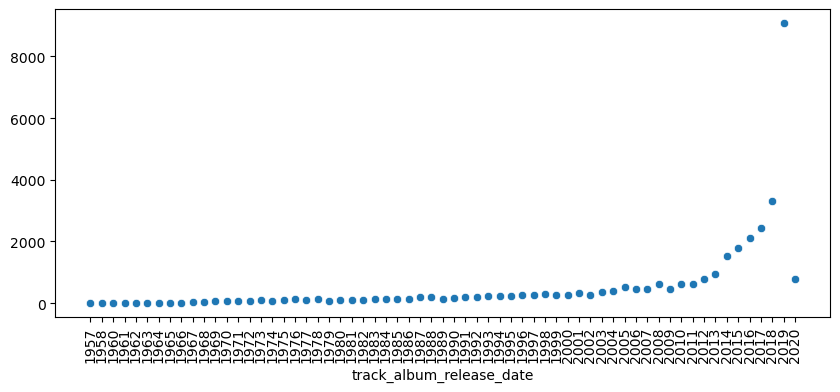

In [65]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(x = df_2.groupby('track_album_release_date')["track_id"].agg("count").index, 
                y = df_2.groupby('track_album_release_date')["track_id"].agg("count").values)
plt.xticks(rotation = 90)
plt.show()

In [66]:
df_2.groupby('track_album_release_date')["track_id"].agg("count")

track_album_release_date
1957       2
1958       1
1960       4
1961       1
1962       2
        ... 
2016    2127
2017    2430
2018    3312
2019    9081
2020     785
Name: track_id, Length: 63, dtype: int64